In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 60s 0us/step


In [3]:
#shows the current path
data_dir

'.\\datasets\\flower_photos'

In [4]:

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]  #lists every files that are in the jpg format

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #counts every files in jpg format
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))  #shows 5 files in roses folder
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

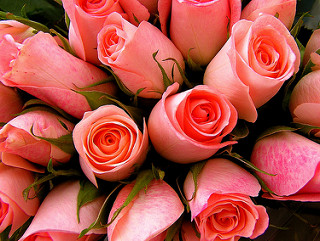

In [13]:
PIL.Image.open(str(roses[8]))

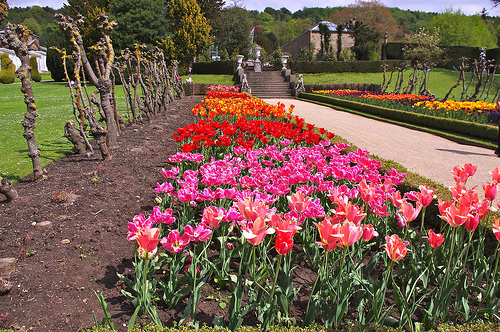

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[9]))

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
#specifiying names to all the images with respect to he folder

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
#specifies unique number for each type of flower class

In [17]:
flowers_images_dict['roses'][:5] 

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [18]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [20]:
img.shape

(240, 179, 3)

In [21]:
cv2.resize(img,(180,180)).shape #resize a single image

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180)) #resizing all immages
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
###Build convolutional neural network and train it

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 61s 621ms/step - loss: 1.3902 - accuracy: 0.4084
Epoch 2/30
86/86 [==============================] - 45s 527ms/step - loss: 1.0260 - accuracy: 0.5890
Epoch 3/30
86/86 [==============================] - 47s 542ms/step - loss: 0.8889 - accuracy: 0.6548
Epoch 4/30
86/86 [==============================] - 45s 529ms/step - loss: 0.7032 - accuracy: 0.7289
Epoch 5/30
86/86 [==============================] - 46s 531ms/step - loss: 0.5249 - accuracy: 0.8132
Epoch 6/30
86/86 [==============================] - 47s 548ms/step - loss: 0.3208 - accuracy: 0.8895
Epoch 7/30
86/86 [==============================] - 474s 6s/step - loss: 0.1726 - accuracy: 0.9455
Epoch 8/30
86/86 [==============================] - 50s 582ms/step - loss: 0.1344 - accuracy: 0.9586
Epoch 9/30
86/86 [==============================] - 49s 564ms/step - loss: 0.0833 - accuracy: 0.9786
Epoch 10/30
86/86 [==============================] - 48s 563ms/step - loss: 0.0628 - accuracy

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 95ms/step - loss: 2.9532 - accuracy: 0.6220


[2.95316219329834, 0.6220043301582336]

In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 4s 108ms/step


array([[ 12.048207  ,  21.033775  ,  -1.9144356 , -19.849442  ,
        -12.548236  ],
       [  9.192014  ,   1.2769828 , -10.648617  ,  -7.0077915 ,
          2.3417356 ],
       [ -6.431987  ,   8.692739  ,  16.268236  , -16.342419  ,
         -1.5339534 ],
       ...,
       [ -2.2006297 ,   0.2225063 , -13.5686    ,   3.0220425 ,
          6.7102504 ],
       [  7.996768  ,  -1.1495101 ,  -5.484814  ,  -0.91757166,
         -4.1545067 ],
       [ -1.8566755 , -14.208187  ,  -4.985848  ,   2.2259617 ,
         -0.875223  ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

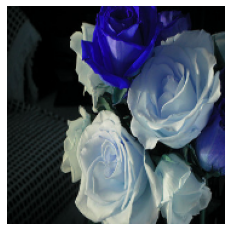

In [40]:
plt.axis('off')
plt.imshow(X[1])

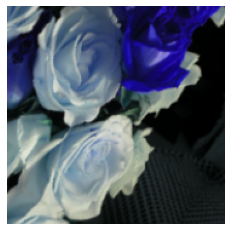

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

In [44]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15) 


Epoch 1/15
86/86 [==============================] - 58s 654ms/step - loss: 1.4040 - accuracy: 0.4150
Epoch 2/15
86/86 [==============================] - 56s 648ms/step - loss: 1.1127 - accuracy: 0.5338
Epoch 3/15
86/86 [==============================] - 64s 741ms/step - loss: 1.0069 - accuracy: 0.6010
Epoch 4/15
86/86 [==============================] - 62s 721ms/step - loss: 0.9200 - accuracy: 0.6432
Epoch 5/15
86/86 [==============================] - 58s 678ms/step - loss: 0.8924 - accuracy: 0.6526
Epoch 6/15
86/86 [==============================] - 57s 657ms/step - loss: 0.8219 - accuracy: 0.6875
Epoch 7/15
86/86 [==============================] - 55s 637ms/step - loss: 0.7808 - accuracy: 0.7082
Epoch 8/15
86/86 [==============================] - 56s 651ms/step - loss: 0.7521 - accuracy: 0.7155
Epoch 9/15
86/86 [==============================] - 55s 641ms/step - loss: 0.7243 - accuracy: 0.7162
Epoch 10/15
86/86 [==============================] - 55s 638ms/step - loss: 0.6972 - accura

In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 110ms/step - loss: 0.9257 - accuracy: 0.6961


[0.9257252216339111, 0.6960784196853638]